***Problem Statement***

<li>It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
<li>Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
<li>Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

***Data Description***

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

<li>InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<li>StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
<li>Description: Product (item) name. Nominal. 
<li>Quantity: The quantities of each product (item) per transaction. Numeric. 
<li>InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 
<li>UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
<li>CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
<li>Country: Country name. Nominal, the name of the country where each customer resides.


**Project Task: Week 1**

Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

##### Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import missingno as msno
from scipy import stats
import seaborn as sns
sns.set()
from textwrap import wrap
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import os
import datetime as dt

##### Define a class for formatting the optput

In [2]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    WHITE = '\033[97m'
    MAGENTA = '\033[95m'
    LIGHTGRAY    = "\033[37m"
    DARKGRAY = '\033[90m'
    BLACK = '\033[90m'
    LIGHTRED = "\033[91m"
    LIGHTGREEN = "\033[92m"
    LIGHTYELLOW = "\033[93m"
    LIGHTBLUE = "\033[94m"
    LIGHTMAGENTA = "\033[95m"
    LIGHTCYAN = "\033[96m"

    DEFAULT = "\033[39m"
    BOLD = '\033[1m'
    DIM = "\033[2m"
    UNDERLINE = '\033[4m'
    BLINK = "\033[5m"
    REVERSE = "\033[7m"
    END = '\033[0m'

    HIDDEN = "\033[8m"
    RESETBOLD = "\033[21m"
    RESETDIM = "\033[22m"
    RESETUNDERLINE = "\033[24m"
    RESETBLINK = "\033[25m"
    RESETREVERSE = "\033[27m"
    RESETHIDDEN = "\033[28m"

    RESETALL = "\033[0m"
    
    BACKGROUNDDEFAULT = "\033[49m"
    BACKGROUNDBLACK = "\033[40m"
    BACKGROUNDRED = "\033[41m"
    BACKGROUNDGREEN = "\033[42m"
    BACKGROUNDYELLOW = "\033[43m"
    BACKGROUNDBLUE = "\033[44m"
    BACKGROUNDMAGENTA = "\033[45m"
    BACKGROUNDCYAN = "\033[46m"
    BACKGROUNDLIGHTGRAY = "\033[47m"
    BACKGROUNDDARKGRAY = "\033[100m"
    BACKGROUNDLIGHTRED = "\033[101m"
    BACKGROUNDLIGHTGREEN = "\033[102m"
    BACKGROUNDLIGHTYELLOW = "\033[103m"
    BACKGROUNDLIGHTBLUE = "\033[104m"
    BACKGROUNDLIGHTMAGENTA = "\033[105m"
    BACKGROUNDLIGHTCYAN = "\033[106m"
    BACKGROUNDWHITE = "\033[107m"

##### Carrying out a broad check for the appropriate location for the Project

In [3]:
os.getcwd()
print((color.BLUE + 
       color.BOLD +
       '\nThe current working directory is \n\n\t' +
       color.END +
       color.GREEN +
       '{}' +
       color.END).
      format(os.getcwd()))


The current working directory is 

	/Users/indiwarjeetsinghhundal/Documents/DataAnalysis/Capstone/Retails


##### Import Datasets

In [4]:
retailData = pd.read_excel("Online Retail.xlsx")

##### Examine the Datasets using the following methods 
<li> head
<li> info
<li> shape
<li> type
<li> dtype
<li> describe

##### retailData Head

In [5]:
print(color.BLUE + 
       color.BOLD + 
       '\nThe retail data with its header and first 5 rows is as follows. \n' +
       color.END)
retailData.head()


The retail data with its header and first 5 rows is as follows. 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


From the data it is seen that the two uniques fields are InvoiceNo and CustomerID. The CustomerID is unique to the customer and the InvoiceID to the Invoice of the products. Each customer can have several Invoices.

##### retailData Info

In [6]:
print((color.BLUE + 
       color.BOLD + 
       '\nThe information of retailData is as follows\n\n' +
       color.END +
       color.GREEN + 
       '{}'+
       color.END).
      format(retailData.info))


The information of retailData is as follows

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3  

##### retailData Shape

In [7]:
print((color.BLUE + 
       color.BOLD +
       '\nThe shape of retailData i.e. the number of rows and columns is as follows \n\n\t' +
       color.END +
       color.GREEN +
       '{}'+
       color.END).
      format(retailData.shape))


The shape of retailData i.e. the number of rows and columns is as follows 

	(541909, 8)


##### retailData Type

In [8]:
print((color.BLUE + 
       color.BOLD + 
       '\nThe type of retailData is as follows\n\n\t' +
       color.END +
       color.GREEN + 
       '{}'+
       color.END).
      format(type(retailData)))


The type of retailData is as follows

	<class 'pandas.core.frame.DataFrame'>


##### retailData Data Types

In [9]:
print((color.BLUE + 
       color.BOLD + 
       'The data types of retailData1 are as follows\n\n' +
       color.END +
       color.GREEN + 
       '{}'+
       color.END).
      format(retailData.dtypes))

The data types of retailData1 are as follows

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


There are a total of 
<li>4 objects
<li>2 float64
<li>1 int 64
<li>1 datetime64

Since CustomerID is a unique value and there is no need to carry any statistical analysis on the same, we can convert it to a string.

##### Adding Revenue Column

In [10]:
retailData['Revenue'] = retailData['Quantity']*retailData['UnitPrice']
print((color.BLUE + 
       color.BOLD +
       "\nThe head of retailData1 with a new column 'Revenue' is as follows \n" +
       color.END))
retailData.head(2)


The head of retailData1 with a new column 'Revenue' is as follows 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


<h3>retailData1</h3>

Removing the Missing Value from retailData1 and assigning it as retailData1

In [11]:
retailData1 = retailData.copy()

##### Define a class for checking the Missing Values and checking the number of missing values by column in retailData

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val,
                              mis_val,
                              mis_val_percent],
                              axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(retailData).transpose()

Your selected dataframe has 9 columns and 541909 Rows.
There are 2 columns that have missing values.


,CustomerID,Description
Zero Values,0,0
Missing Values,135080,1454
% of Total Values,24.9,0.3
Total Zero Missing Values,135080,1454
% Total Zero Missing Values,24.9,0.3
Data Type,float64,object


The columns with Missing Values are Description and CustomerID. Since CustomerID is a Unique Identity of a customer it can not be imputed. Thus for a proper analysis these rows will have to be dropped. Description will not affect the results both due to the nature of the column as well as the low number of na's. Also note CustomeID is a float when it does not need to be statistically evaluated and could be a string.

##### Removing Missing Values

In [13]:
retailData1 = retailData1.dropna()
print((color.BLUE + 
       color.BOLD +
       '\nThe shape of retailData after dropping the NAs is as follows \n\n\t' +
       color.END +
       color.GREEN +
       '{}'+
       color.END).
      format(retailData1.shape))


The shape of retailData after dropping the NAs is as follows 

	(406829, 9)


<h3> Exploratory Data Analysis </h3>

In [14]:
retailData1['CustomerID'] = retailData1['CustomerID'].astype(str)

print(color.BOLD +
      color.BLUE +
      'The datatypes in retailData1 are as follows \n'+
     color.END)
for i in retailData1.columns:
    a=retailData1[i].dtype
    if a == 'object':
        print(color.PURPLE +
              "{} \t : \t\t Object Types".format(i)+
             color.END)
    elif a == 'int64':
        print(color.BLUE +
              "{} \t : \t\t Int Types".format(i)+
             color.END)
    elif a == 'float64':
        print(color.CYAN +
            "{} \t : \t\t Float Types".format(i)+
             color.END)
    else:
        print("{} \t : \t\t Date Time".format(i))

The datatypes in retailData1 are as follows 

InvoiceNo 	 : 		 Object Types
StockCode 	 : 		 Object Types
Description 	 : 		 Object Types
Quantity 	 : 		 Int Types
InvoiceDate 	 : 		 Date Time
UnitPrice 	 : 		 Float Types
CustomerID 	 : 		 Object Types
Country 	 : 		 Object Types
Revenue 	 : 		 Float Types


<h5>Analysis of Numeric Dimensions of retailData1</h5>

In [15]:
print(color.BLUE +
      color.BOLD +
      '\nThe details of retailData are as follows.' +
     color.END) 
retailData1.describe(datetime_is_numeric=True)


The details of retailData are as follows.


,Quantity,InvoiceDate,UnitPrice,Revenue
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,20.401854
min,-80995.000000,2010-12-01 08:26:00,0.000000,-168469.600000
25%,2.000000,2011-04-06 15:02:00,1.250000,4.200000
50%,5.000000,2011-07-31 11:48:00,1.950000,11.100000
75%,12.000000,2011-10-20 13:06:00,3.750000,19.500000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,248.693370,NaN,69.315162,427.591718


<li>The minimum for Quantity and Revenue show negative values indicating that these could either be refunds or erros
<li>The max and min values in Quantity seems to be an outlier as these are hugely different from the 3rd quartile. Moreover since these are equal and opposite, there could be either a refund or indicate an anomaly.
<li>The data is from 2010-12-01 to 2011-12-09. Note from 2010-12-01 to 2011-11-30 are full months and from 2011-12-01 to 2011-12-09 is a partial month of 9 days. Thus for monthly analysis these 9 days in Dec-2011 could be disregarded.

<h5>Lets check the data dispersion visually through a boxplot as well</h5>


The boxplot is used to check the dipersion of data and hence the outliers. 



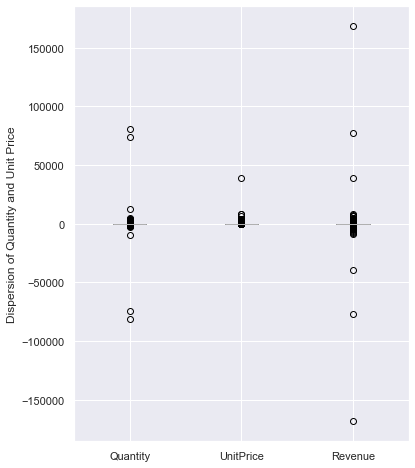

In [16]:
print(color.BLUE +
      color.BOLD +
      '\nThe boxplot is used to check the dipersion of data and hence the outliers. \n' +
      color.END.
      format(retailData1.boxplot(column=['Quantity','UnitPrice','Revenue'],
                    figsize=(6,8)).set_ylabel('Dispersion of Quantity and Unit Price')))

<li>From the above it can be seen that there are two outliers in the Quantity which have the same positive and negative value.
<li>These could be erroneously purchased and returned or there could be a clerical errors.
<li>In the UnitPrice section there is only one outlier on the negative side. This could correspond to one returen and refund.<li>Thus, at lease one Quantity seems to be erroneous the one has a corresponding negative Unit Price.

<h5> Let's also assess the Categorical Columns.</h5> 

In [17]:
print(color.BLUE +
      color.BOLD +
    '\nThe description of retailData1 is as follows.' +
     color.END) 

retailData1.describe(include=['O'])


The description of retailData1 is as follows.


,InvoiceNo,StockCode,Description,CustomerID,Country
count,406829,406829,406829,406829,406829
unique,22190,3684,3896,4372,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841.0,United Kingdom
freq,542,2077,2070,7983,361878


<li>There are 37 unique countries and the top country is 'United Kingdom' with a freq of 361878 
<li>There are 3896 unique product descriptions and the top product description in 'WHITE HANGING HEART T-LIGHT HOLDER' with a freq of 2070. There are 3684 unique Stock Codes. Thus, some Item Descriptions could have the same stock code. The StockCode 85123A has topped with a freq of 2077.
<li>There are 4372 unique CustomerIDs with the CustomerIID 17841 having a freq of 7983

<h3>retailData2</h3>

Removing the Duplicate Value from retailData1 and assigning it as retailData2

<h5> Number of Duplicate Values in retailData1</h5> 

In [18]:
print(color.BOLD +
      color.BLUE +
      'The total no. of duplicates rows which need to be deleted are \n\n\t' +
      color.END +
      '{}'.
      format(retailData1.duplicated().sum()))

The total no. of duplicates rows which need to be deleted are 

	5225


<h5> Remvoming duplicates from retailData1 and reasigning as retailData2</h5> 

In [19]:
retailData2 = retailData1.drop_duplicates()

print(color.BOLD +
      color.BLUE +
      'The shape of retailData4 \n\n\t' +
      color.END +
      '{}'.
      format(retailData2.shape))

The shape of retailData4 

	(401604, 9)


Let's assess the Refunds
The Invoice No of refunds starts with the 'C' in InvoiceNo <br>

In [20]:
retailData2[retailData2["InvoiceNo"].
            str.startswith('C',
                       na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


<h3>retailData3</h3>

Removing the refunds be removing all negative values and assigning it as retailData3

In [21]:
retailData3 = retailData2[retailData2["UnitPrice"]>=0]
retailData3 = retailData2[retailData2["Quantity"]>=0]
print((color.BLUE + 
       color.BOLD +
       '\nThe shape of retailData2 is as follows \n\n\t' +
       color.END +
       color.GREEN +
       '{}'+
       color.END).
      format(retailData3.shape))


The shape of retailData2 is as follows 

	(392732, 9)


Let's check the description of the new dataset after removing the negative values.

In [22]:
retailData3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
Revenue,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.80,168469.60


In [23]:
print(color.BLUE +
      color.BOLD +
    '\nThe description of retailData1 is as follows.' +
     color.END) 

retailData3.describe(include=['O']).transpose()


The description of retailData1 is as follows.


,count,unique,top,freq
InvoiceNo,392732,18536,576339,542
StockCode,392732,3665,85123A,2023
Description,392732,3877,WHITE HANGING HEART T-LIGHT HOLDER,2016
CustomerID,392732,4339,17841.0,7676
Country,392732,37,United Kingdom,349227


Out of the 392732 entries there are 4339 unique customers from 37 countries who have ordered 3877 different products through 18536 different invoices.

Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

<h5>Uniques Values</h5>

In [24]:
print(color.BOLD +
      color.BLUE +
      '\nThe countries being served are as follows \n\n\t' +
      color.END +
      '{}'.
      format(retailData3['Country'].unique()))


The countries being served are as follows 

	['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [25]:
print(color.BOLD +
      color.BLUE +
      '\nThe no. of unique countries are as follows \n\n\t' +
      color.END +
      '{}'.
      format(retailData3['Country'].nunique()))


The no. of unique countries are as follows 

	37


In [26]:
print(color.BOLD +
      color.BLUE +
      'The no. of Uniquie Categories per Dimension in descending order are as follows: \n\n' +
      color.END +
      '{}'.
      format(retailData3.nunique().sort_values(ascending=False)))

The no. of Uniquie Categories per Dimension in descending order are as follows: 

InvoiceNo      18536
InvoiceDate    17286
CustomerID      4339
Description     3877
StockCode       3665
Revenue         2940
UnitPrice        441
Quantity         302
Country           37
dtype: int64


Analysis of Sales by Country

In [27]:
print(color.BOLD +
      color.BLUE +
      'The number of products sold by country are as follows. \n\n' +
      color.END +
      '{}'.
      format(retailData3.
             groupby(['Country']).
             size().
             sort_values(ascending=False)))

The number of products sold by country are as follows. 

Country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA  

<h5>Comparison of the top 5 countries</h5>

In [28]:
print(color.BOLD +
      color.BLUE +
      '\nThe maximum transactions for top 5 countries based on number of products is as follows:\n\n' +
      color.END +
      '{}'.
      format(retailData3.groupby(['Country']).size().nlargest(5)))


The maximum transactions for top 5 countries based on number of products is as follows:

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
dtype: int64


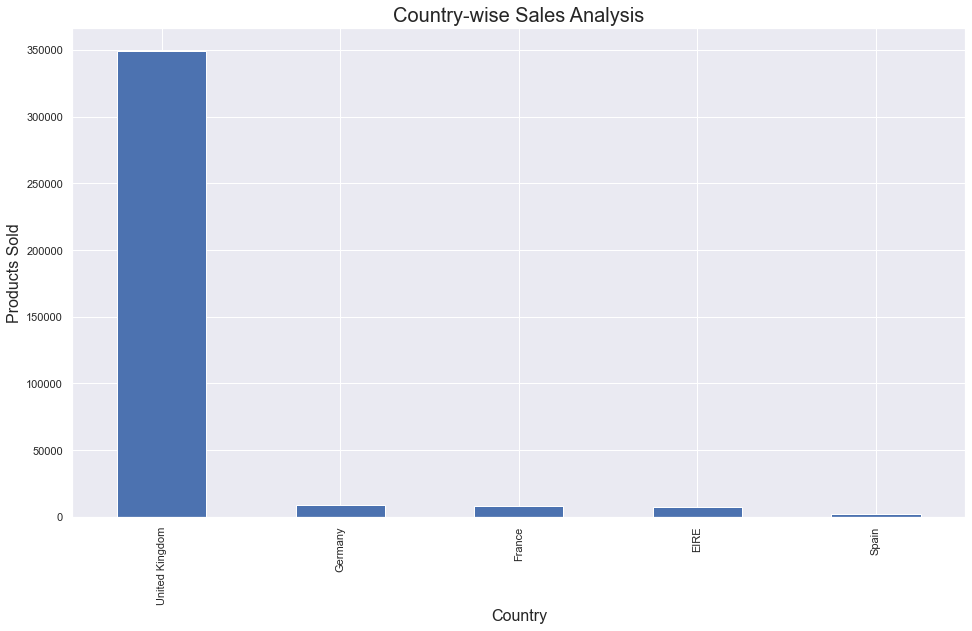

In [29]:
plt.figure(figsize=(16,9))
retailData3.Country.value_counts().nlargest(5).plot(kind='bar')
plt.xlabel("Country",
          fontsize = 16)
plt.ylabel("Products Sold",
          fontsize = 16)
plt.title('Country-wise Sales Analysis',
          fontsize = 20)
plt.show()

Analysis of Revenue and Quantity by Country for the top 5 countries

In [30]:
print(color.BOLD +
      color.BLUE +
      '\nThe country wise revenue for the top 5 countries is as follows.\n\n' +
      color.END +
      '{}\n'.
      format(retailData3.groupby('Country')['Revenue'].sum().nlargest(5)))


The country wise revenue for the top 5 countries is as follows.

Country
United Kingdom    7.285025e+06
Netherlands       2.854463e+05
EIRE              2.652625e+05
Germany           2.286784e+05
France            2.089343e+05
Name: Revenue, dtype: float64



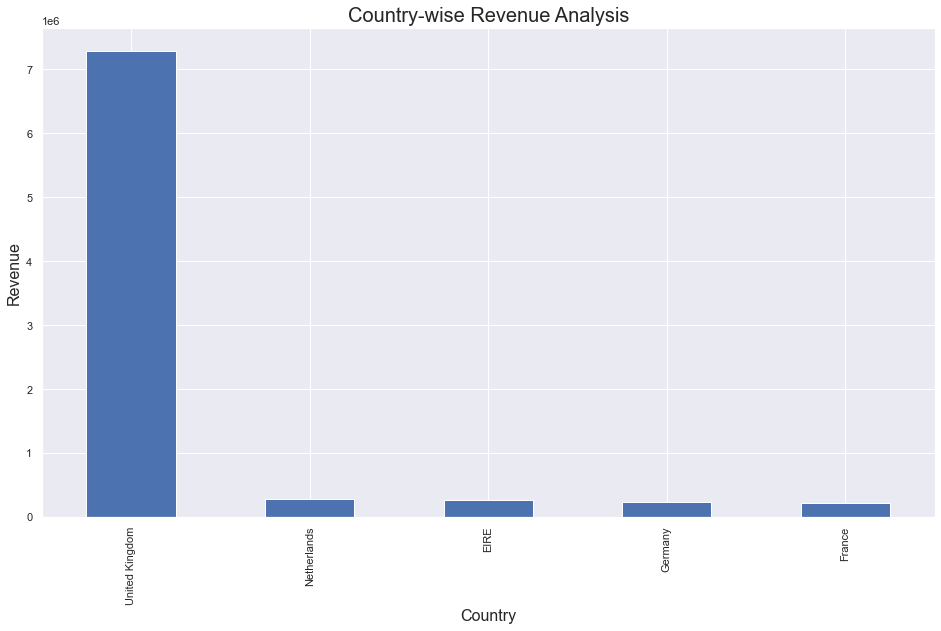

In [31]:
plt.figure(figsize=(16,9))
retailData3.groupby('Country')['Revenue'].sum().nlargest(5).plot(kind='bar')
plt.xlabel("Country",
          fontsize = 16)
plt.ylabel("Revenue",
          fontsize = 16)
plt.title('Country-wise Revenue Analysis',
          fontsize = 20)
plt.show()

In [32]:
print(color.BOLD +
      color.BLUE +
      '\nThe country wise quantity for the top 5 countries is as follows.\n\n' +
      color.END +
      '{}\n'.
      format(retailData3.groupby('Country').sum()['Quantity'].nlargest(5)))


The country wise quantity for the top 5 countries is as follows.

Country
United Kingdom    4254037
Netherlands        200937
EIRE               140383
Germany            119156
France             111429
Name: Quantity, dtype: int64



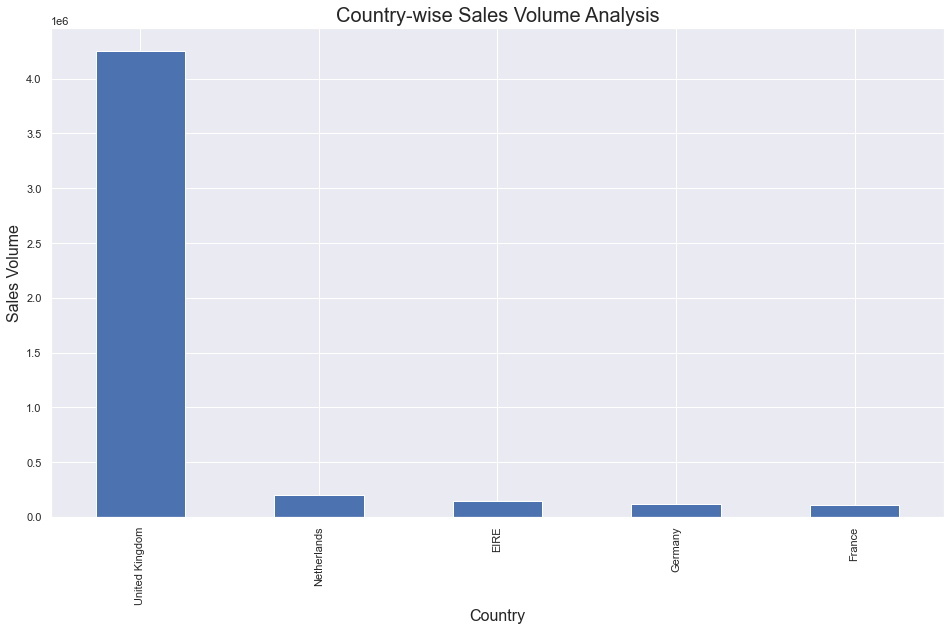

In [33]:
plt.figure(figsize=(16,9))
retailData3.groupby('Country').sum()['Quantity'].nlargest(5).plot(kind='bar')
plt.xlabel("Country",
          fontsize = 16)
plt.ylabel("Sales Volume",
          fontsize = 16)
plt.title('Country-wise Sales Volume Analysis',
          fontsize = 20)
plt.show()

Analysis of Revenue and Quantity Purchased by Produce Description of top 5 products

In [34]:
print(color.BOLD +
      color.BLUE +
      '\nThe revenue for the top 5 product descriptions is as follows.\n\n' +
      color.END +
      '{}\n'.
      format(retailData3.groupby('Description').sum()['Revenue'].nlargest(5)))


The revenue for the top 5 product descriptions is as follows.

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: Revenue, dtype: float64



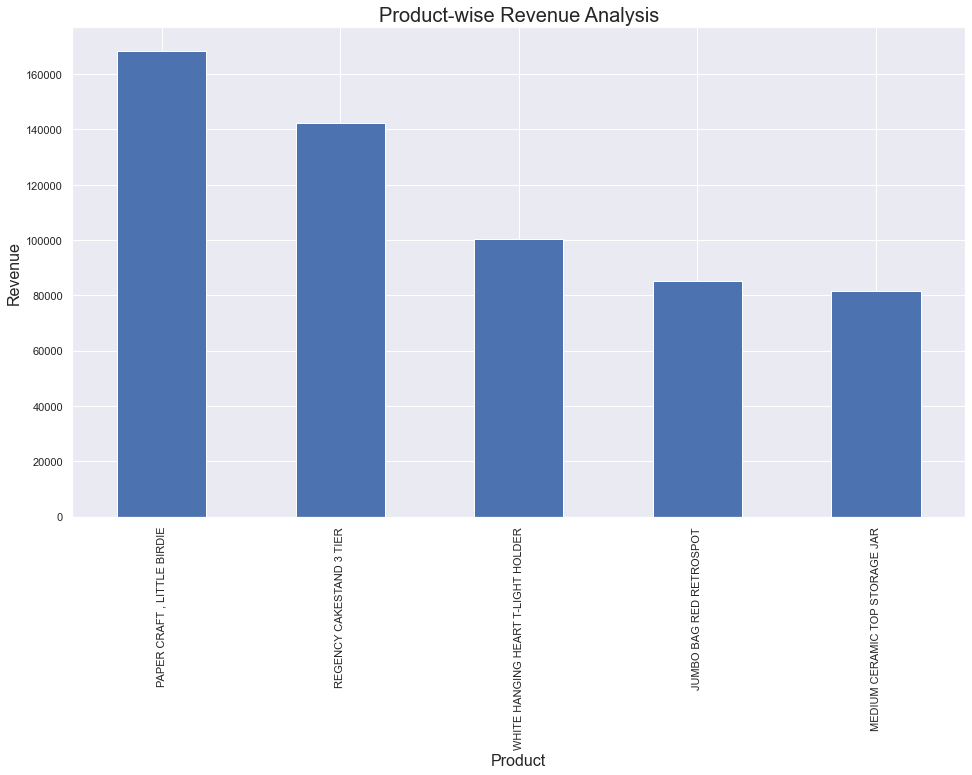

In [35]:
plt.figure(figsize=(16,9))
retailData3.groupby('Description').sum()['Revenue'].nlargest(5).plot(kind='bar')
plt.xlabel("Product",
          fontsize = 16)
plt.ylabel("Revenue",
          fontsize = 16)
plt.title('Product-wise Revenue Analysis',
          fontsize = 20)
plt.show()

In [36]:
print(color.BOLD +
      color.BLUE +
      '\nThe quantity for the top 5 product descriptions is as follows.\n\n' +
      color.END +
      '{}\n'.
      format(retailData3.groupby('Description').sum()['Quantity'].nlargest(5)))


The quantity for the top 5 product descriptions is as follows.

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
Name: Quantity, dtype: int64



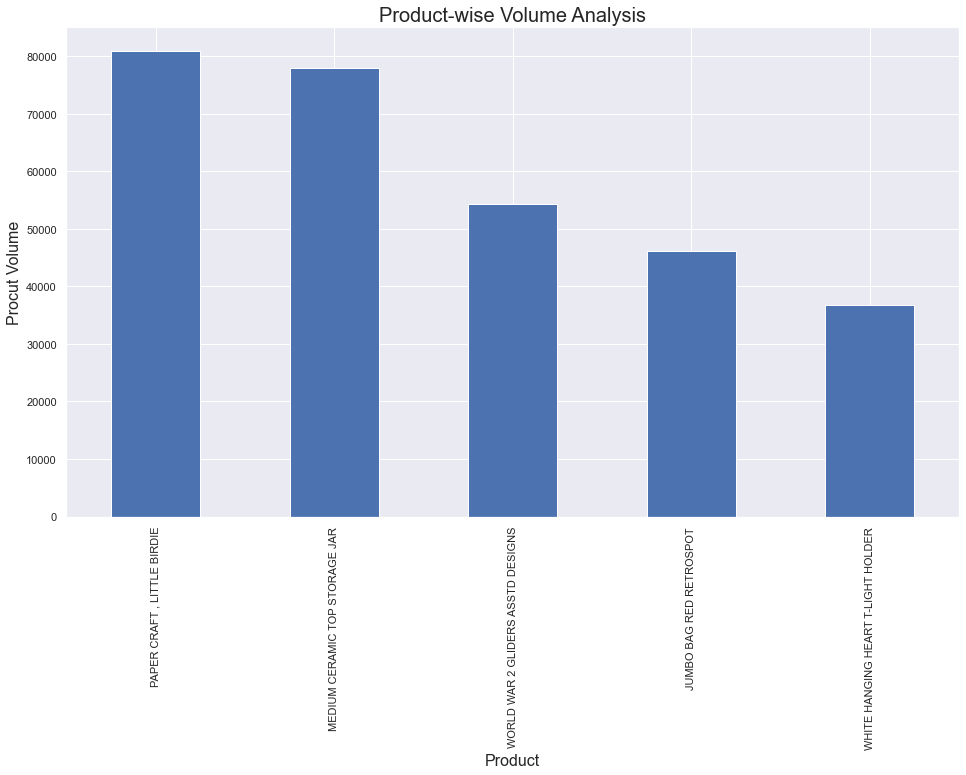

In [37]:
plt.figure(figsize=(16,9))
retailData3.groupby('Description').sum()['Quantity'].nlargest(5).plot(kind='bar')
plt.xlabel("Product",
          fontsize = 16)
plt.ylabel("Procut Volume",
          fontsize = 16)
plt.title('Product-wise Volume Analysis',
          fontsize = 20)
plt.show()

<h5>Analysis of Data by segmenting it into Months.</h5>

In [38]:
def get_month(x): return dt.datetime(x.year, x.month, 1)

retailData3['TransactionMonth'] = retailData3['InvoiceDate'].apply(get_month)
print(color.BLUE +
      color.BOLD +
      '\nThe retailData3 with Transaction Month added as a column by removing the time is as follows.' +
     color.END)
retailData3.head()


The retailData3 with Transaction Month added as a column by removing the time is as follows.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,TransactionMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [39]:
print(color.BOLD +
      color.BLUE +
      '\nThe number of Unique Month Year Combination in retailData are as follows.\n\n\t' +
      color.END +
      '{}\n'.
      format(retailData3['TransactionMonth'].nunique()))


The number of Unique Month Year Combination in retailData are as follows.

	13



In [40]:
retailData3['TransactionMonth1'] = pd.DatetimeIndex(retailData3['InvoiceDate']).strftime('%Y-%b')
print(color.BLUE +
      color.BOLD +
      '\nThe retailData with Transaction Month and Year combination added as a column is as follows.' +
     color.END)
retailData3.head()


The retailData with Transaction Month and Year combination added as a column is as follows.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,TransactionMonth,TransactionMonth1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-Dec
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-Dec
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-Dec


In [41]:
print(color.BOLD +
      color.BLUE +
      '\nThe groupby result for Transaction Month and Year in retailData3 are as follows.\n\n\t' +
      color.END +
      '{}\n'.
      format(retailData3.groupby('TransactionMonth1').size().sort_values(ascending=False)))


The groupby result for Transaction Month and Year in retailData3 are as follows.

	TransactionMonth1
2011-Nov    63182
2011-Oct    48796
2011-Sep    39671
2011-May    28075
2011-Jun    26926
2011-Mar    26872
2011-Aug    26796
2011-Jul    26582
2010-Dec    25673
2011-Apr    22435
2011-Jan    20991
2011-Feb    19707
2011-Dec    17026
dtype: int64



In [42]:
print(color.BOLD +
      color.BLUE +
      '\nThe max sales were achieved in the month of \n\n\t'+
      color.END +
      '{}\n'.
      format(retailData3.groupby('TransactionMonth1').size().sort_values(ascending=False).nlargest(1)))


The max sales were achieved in the month of 

	TransactionMonth1
2011-Nov    63182
dtype: int64



<h3>retailData4</h3>

Removing the incomplete month and assigning it as retailData4 which considers only Full Months

In [43]:
retailData4 = retailData3[~(retailData3['InvoiceDate'] > '2011-12-01')]

In [44]:
print(color.BOLD +
      color.BLUE +
      '\nThe Month Year combinations for the full months are as follows.\n\n' +
      color.END +
      '{}\n'.
      format(retailData4.groupby('TransactionMonth1').size().sort_values(ascending=False)))


The Month Year combinations for the full months are as follows.

TransactionMonth1
2011-Nov    63182
2011-Oct    48796
2011-Sep    39671
2011-May    28075
2011-Jun    26926
2011-Mar    26872
2011-Aug    26796
2011-Jul    26582
2010-Dec    25673
2011-Apr    22435
2011-Jan    20991
2011-Feb    19707
dtype: int64



In [45]:
print(color.BOLD +
      color.BLUE +
      '\nThe number of Unique Month Year Combination in retailData4 are as follows.\n\n\t' +
      color.END +
      '{}\n'.
      format(retailData4['TransactionMonth1'].nunique()))


The number of Unique Month Year Combination in retailData4 are as follows.

	12



In [46]:
print(color.BOLD +
      color.BLUE +
      '\nThe maximum sales per month are in the month starting 2011-11-01 and equal \n\n\t' +
      color.END +
      '{}\n'.
      format(retailData4.groupby('TransactionMonth').size().max()))


The maximum sales per month are in the month starting 2011-11-01 and equal 

	63182



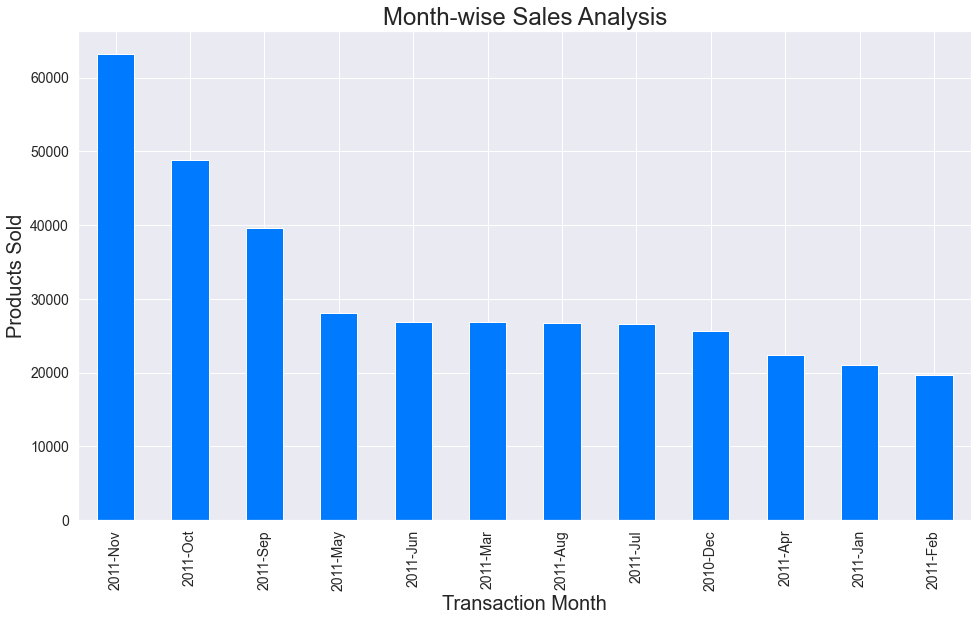

In [47]:
plt.figure(figsize=(16,9))
retailData4.TransactionMonth1.value_counts().plot(kind='bar',
                                                  color='#007aff',
                                                  fontsize = 14)

plt.xlabel("Transaction Month",
          fontsize = 20)
plt.ylabel("Products Sold",
          fontsize = 20)
plt.title('Month-wise Sales Analysis',
         fontsize = 24)
plt.show()

In [48]:
retailDataCohort = retailData4.groupby('TransactionMonth1').agg({'Country':pd.Series.nunique,
                                              'CustomerID':pd.Series.nunique,
                                              'Description':pd.Series.nunique,
                                              'StockCode':pd.Series.nunique,
                                              'Quantity':np.sum,
                                              'Revenue':np.sum
                                             })
print(color.BOLD +
      color.BLUE +
      '\nThe month and year wise grouped data for the full months for Cohort Analysis is as follows \n' +
      color.END)

retailDataCohort


The month and year wise grouped data for the full months for Cohort Analysis is as follows 



,Country,CustomerID,Description,StockCode,Quantity,Revenue
TransactionMonth1,,,,,,
2010-Dec,22,885,2418,2411,311063,570422.730
2011-Apr,24,856,2225,2217,291369,468374.331
2011-Aug,23,935,2386,2356,398190,644051.040
2011-Feb,24,758,2122,2124,265043,446084.920
2011-Jan,20,741,2118,2121,348522,568101.310
2011-Jul,24,949,2373,2351,367372,598962.901
2011-Jun,24,991,2361,2339,363014,660046.050
2011-Mar,22,974,2240,2234,347623,594081.760
2011-May,20,1056,2255,2219,372948,677355.150


In [49]:
retailDataCohortCustomerID = retailData4.groupby('TransactionMonth1')['CustomerID'].nunique()
print(color.BLUE +
      color.BOLD +
      '\nThe cohort analysis based on grouping CustomerIDs over the month are as follows\n\n' +
      color.END +
      '{}'.
      format(retailDataCohortCustomerID))


The cohort analysis based on grouping CustomerIDs over the month are as follows

TransactionMonth1
2010-Dec     885
2011-Apr     856
2011-Aug     935
2011-Feb     758
2011-Jan     741
2011-Jul     949
2011-Jun     991
2011-Mar     974
2011-May    1056
2011-Nov    1665
2011-Oct    1364
2011-Sep    1266
Name: CustomerID, dtype: int64


Text(0, 0.5, 'Transaction Month and Year')

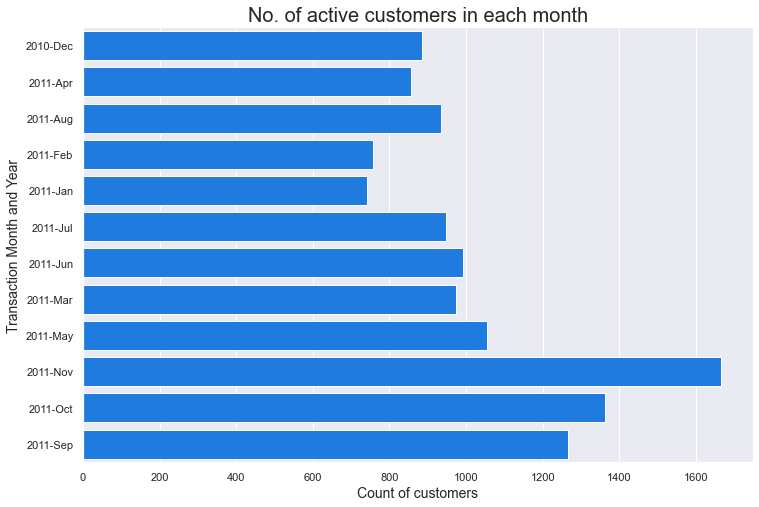

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x = retailDataCohortCustomerID.values,
            y = retailDataCohortCustomerID.index,
            color='#007aff');
plt.title("No. of active customers in each month", fontsize = 20)
plt.xlabel("Count of customers", fontsize = 14)
plt.ylabel("Transaction Month and Year", fontsize = 14)

In [51]:
retailDataCohortCountry = retailData4.groupby('TransactionMonth1')['Country'].size()
print(color.BOLD +
      color.BLUE +
      '\nThe cohort analysis based on grouping Country data over the month are as follows\n\n' +
      color.END +
      '{}\n'.
      format(retailDataCohortCountry))


The cohort analysis based on grouping Country data over the month are as follows

TransactionMonth1
2010-Dec    25673
2011-Apr    22435
2011-Aug    26796
2011-Feb    19707
2011-Jan    20991
2011-Jul    26582
2011-Jun    26926
2011-Mar    26872
2011-May    28075
2011-Nov    63182
2011-Oct    48796
2011-Sep    39671
Name: Country, dtype: int64



Text(0, 0.5, 'Transaction Month and Year')

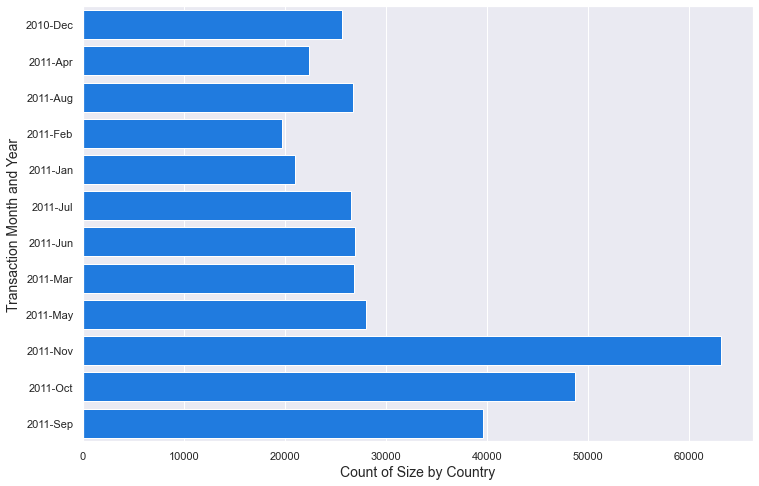

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x = retailDataCohortCountry.values,
            y = retailDataCohortCountry.index,
            color='#007aff'
           );
plt.xlabel("Count of Size by Country", fontsize = 14)
plt.ylabel("Transaction Month and Year", fontsize = 14)

***Retention of Customers***

#### retailDataCohort - retailDataCohort.shift(1)

Note: 2010-Dec has only NaN since there is no data available for 2010-09 to compare the retention

***Project Task: Week 2***

Data Modeling :

1. Build a <b>RFM (Recency Frequency Monetary) model</b>. <br>
Recency means the number of days since a customer made the last purchase.<br>
Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year.<br>
Monetary is the total amount of money a customer spent in that given period.<br>
Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.<br>

2. Calculate <b>RFM metrics</b>.

3. Build <b>RFM Segments</b>. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. <b>Combine three ratings</b> to get a RFM segment (as strings).

b2. Get the <b>RFM score by adding up</b> the three ratings.

b3. Analyze the <b>RFM segments by summarizing</b> them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

Steps of RFM(Recency, Frequency, Monetary):
<li>Calculate the Recency, Frequency, Monetary values for each customer.
<li>Add segment bin values to RFM table using quartile.
<li>Sort the customer RFM score in ascending order.

<h3> Calculating the Recency, Frequency, Monetary values for each customer.</h3>

Let's revisit the relevant dataset. For this we chose retailData3 to consider then entire data and not leave the incomplete months

In [53]:
retailData3.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,TransactionMonth,TransactionMonth1
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-Dec
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-Dec
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-Dec


In [54]:
print((color.BLUE + 
       color.BOLD + 
       'The data types of retailData1 are as follows\n\n' +
       color.END +
       color.GREEN + 
       '{}'+
       color.END).
      format(retailData3.dtypes))

The data types of retailData1 are as follows

InvoiceNo                    object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
UnitPrice                   float64
CustomerID                   object
Country                      object
Revenue                     float64
TransactionMonth     datetime64[ns]
TransactionMonth1            object
dtype: object


<li>For Recency, Calculate the number of days between present date and date of last purchase each customer.
<li>For Frequency, Calculate the number of orders for each customer.
<li>For Monetary, Calculate sum of purchase price for each customer.

In [55]:
lastInvoiceDate = max(retailData3['InvoiceDate'])

print(color.BOLD +
      color.BLUE +
      'The last invoice date is \n\n' +
      color.END +
      '\t{}'.
      format(lastInvoiceDate))

The last invoice date is 

	2011-12-09 12:50:00


In [56]:
retailDataRFM = retailData3.groupby('CustomerID').agg({'InvoiceDate': lambda date: (lastInvoiceDate - date.max()).days, # Recency
                                                       'InvoiceNo': lambda num: len(num),  # Frequency
                                                       'Revenue': lambda price: price.sum()})     # Monetary Value

In [57]:
retailDataRFM.columns

Index(['InvoiceDate', 'InvoiceNo', 'Revenue'], dtype='object')

In [58]:
retailDataRFM.rename(columns={'InvoiceDate': 'Recency',
                              'InvoiceNo': 'Frequency',
                              'Revenue': 'Monetary'}, inplace=True)

In [59]:
retailDataRFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


In [60]:
retailDataRFM1 = retailDataRFM.copy()
retailDataRFM1['Recency'] = retailDataRFM1['Recency'].astype(int)
retailDataRFM1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,182,4310.00
12348.0,74,31,1797.24
12349.0,18,73,1757.55
12350.0,309,17,334.40


<h3>Adding segment bin values to RFM table using quartile.</h3>

In [61]:
retailDataRFM1['r_quartile'] = pd.qcut(retailDataRFM1['Recency'], 4, ['1','2','3','4'])
retailDataRFM1['f_quartile'] = pd.qcut(retailDataRFM1['Frequency'], 4, ['4','3','2','1'])
retailDataRFM1['m_quartile'] = pd.qcut(retailDataRFM1['Monetary'], 4, ['4','3','2','1'])

In [62]:
retailDataRFM1['RFM_Score'] = retailDataRFM1.r_quartile.astype(str)+ retailDataRFM1.f_quartile.astype(str) + retailDataRFM1.m_quartile.astype(str)
retailDataRFM1.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12347.0,1,182,4310.00,1,1,1,111
12348.0,74,31,1797.24,3,3,1,331
12349.0,18,73,1757.55,2,2,1,221
12350.0,309,17,334.40,4,4,3,443


In [63]:
retailDataRFM1['RFM_Score'].unique()

array(['441', '111', '331', '221', '443', '444', '422', '211', '132',
       '311', '333', '122', '433', '144', '322', '232', '143', '332',
       '121', '411', '233', '223', '222', '243', '421', '432', '431',
       '244', '343', '133', '341', '321', '334', '342', '434', '213',
       '131', '344', '242', '312', '123', '313', '442', '141', '231',
       '212', '324', '412', '423', '112', '142', '234', '134', '113',
       '424', '323', '224', '124', '241', '413', '114'], dtype=object)

In [64]:
retailDataRFM1['RFM_Score'].max()

'444'

Filter out Top/Best cusotmers

In [65]:
custMostImp = retailDataRFM1[retailDataRFM1['RFM_Score']==retailDataRFM1['RFM_Score'].max()]

print(color.BLUE +
      color.BOLD +
      'The most important customers are as follows.' +
      color.END)

custMostImp.head()

The most important customers are as follows.


,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12353.0,203,4,89.00,4,4,4,444
12361.0,286,10,189.90,4,4,4,444
12401.0,302,5,84.30,4,4,4,444
12402.0,322,11,225.60,4,4,4,444
12441.0,366,11,173.55,4,4,4,444


<AxesSubplot:ylabel='Frequency'>

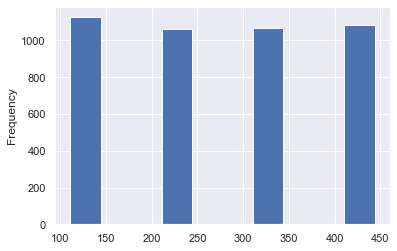

In [66]:
retailDataRFM1['RFM_Score'] = retailDataRFM1['RFM_Score'].astype(int)
retailDataRFM1['RFM_Score'].plot(kind='hist')

In [67]:
labels_5 = ['Low Value  Customers',
            'Normal Customers',
            'Valuable Customers',
            'Highly Valuable Customers',
            'Top Customers']

In [68]:
retailDataRFM1['RFM_Score_Labels'] = pd.qcut(retailDataRFM1['RFM_Score'],
                                             q=[0,0.25, 0.5, 0.75, 0.90, 1],
                                             labels=labels_5)
retailDataRFM1

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFM_Score,RFM_Score_Labels
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,Highly Valuable Customers
12347.0,1,182,4310.00,1,1,1,111,Low Value Customers
12348.0,74,31,1797.24,3,3,1,331,Valuable Customers
12349.0,18,73,1757.55,2,2,1,221,Normal Customers
12350.0,309,17,334.40,4,4,3,443,Highly Valuable Customers
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,Top Customers
18281.0,180,7,80.82,4,4,4,444,Top Customers
18282.0,7,12,178.05,1,4,4,144,Low Value Customers


In [69]:
print(retailDataRFM1.describe())

           Recency    Frequency       Monetary    RFM_Score
count  4339.000000  4339.000000    4339.000000  4339.000000
mean     91.518322    90.512100    2048.215924   276.206038
std     100.009747   225.515328    8984.248352   118.825268
min       0.000000     1.000000       0.000000   111.000000
25%      17.000000    17.000000     306.455000   144.000000
50%      50.000000    41.000000     668.560000   244.000000
75%     141.000000    98.000000    1660.315000   344.000000
max     373.000000  7676.000000  280206.020000   444.000000


In [70]:
print(color.BOLD +
      color.BLUE +
      'The count of customers based on their value to the company is as follows \n\n' +
      color.END +
      '{}'.
      format(retailDataRFM1.
             groupby(['RFM_Score_Labels']).
             size()))

The count of customers based on their value to the company is as follows 

RFM_Score_Labels
Low Value  Customers         1126
Normal Customers             1063
Valuable Customers           1066
Highly Valuable Customers     703
Top Customers                 381
dtype: int64


<h5>RFM Result Interpretation</h5>

Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

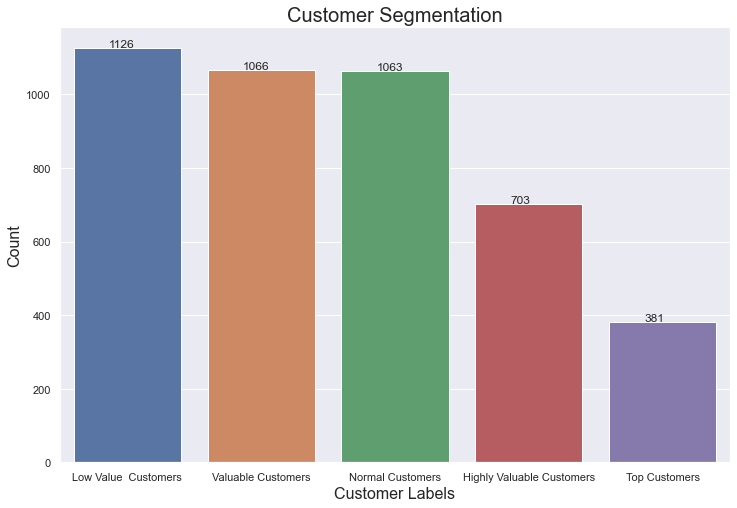

In [71]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='RFM_Score_Labels',
                   data=retailDataRFM1,
                   order=retailDataRFM1['RFM_Score_Labels'].value_counts().index[:5])
ax.set_ylabel('Count',
             fontsize = 16)
ax.set_xlabel('Customer Labels',
             fontsize = 16)
ax.set_title('Customer Segmentation',
             fontsize = 20);

value_ticks = []
for x in retailDataRFM1['RFM_Score_Labels'].value_counts():
    value_ticks.append(str(int(x)))

for a, label in zip(ax.patches, value_ticks):
    ax.annotate(label, (a.get_x() + 0.26, a.get_height() + 2))

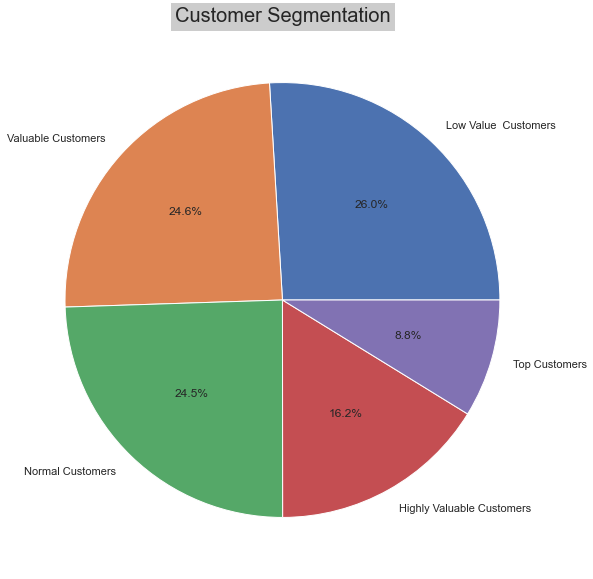

In [72]:
plt.figure(figsize=(10,10))

plt.pie(retailDataRFM1.RFM_Score_Labels.value_counts(),
        labels=retailDataRFM1.RFM_Score_Labels.value_counts().index,
        autopct='%1.1f%%')

plt.title("Customer Segmentation",
          bbox={'facecolor':'0.8', 'pad':5},
          fontsize = 20)
         
plt.show()

In [73]:
def skewness(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

In [74]:
retailDataRFM1.dtypes

Recency                int64
Frequency              int64
Monetary             float64
r_quartile          category
f_quartile          category
m_quartile          category
RFM_Score              int64
RFM_Score_Labels    category
dtype: object

Recency's: Skew: 1.2459259732239887, : SkewtestResult(statistic=26.614420985448668, pvalue=4.6224317516580606e-156)
Frequency's: Skew: 18.03738064812122, : SkewtestResult(statistic=83.49375938071402, pvalue=0.0)
Monetary's: Skew: 19.334715695239407, : SkewtestResult(statistic=85.02391804593985, pvalue=0.0)


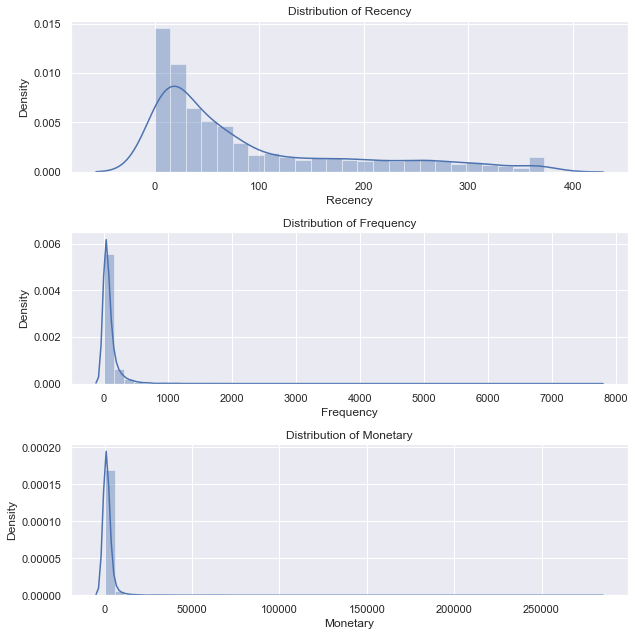

In [75]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
skewness(retailDataRFM1,'Recency')

plt.subplot(3, 1, 2)
skewness(retailDataRFM1,'Frequency')

plt.subplot(3, 1, 3)
skewness(retailDataRFM1,'Monetary')

plt.tight_layout()

***Project Task: Week 3***

Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [76]:
retailRFMLog = retailDataRFM.copy()
retailRFMLog.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,90.512100,2048.215924
std,100.009747,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.000000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


In [77]:
retailRFMLog.dtypes

Recency        int64
Frequency      int64
Monetary     float64
dtype: object

In [78]:
def kmeans(retailDataRFM, clusters_number, retailDataRFM1):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(retailDataRFM1)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = retailData.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

<h5>Log Transformation is used since the data is right skewed, log transformation will be used.</h5>

In [79]:
retailRFMLog['Recency'] = np.log(retailRFMLog['Recency'])
retailRFMLog['Frequency'] = np.log(retailRFMLog['Frequency'])
retailRFMLog['Monetary'] = np.log(retailRFMLog['Monetary']-retailRFMLog['Monetary'].min()+1)

<h5>b. Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.</h5>

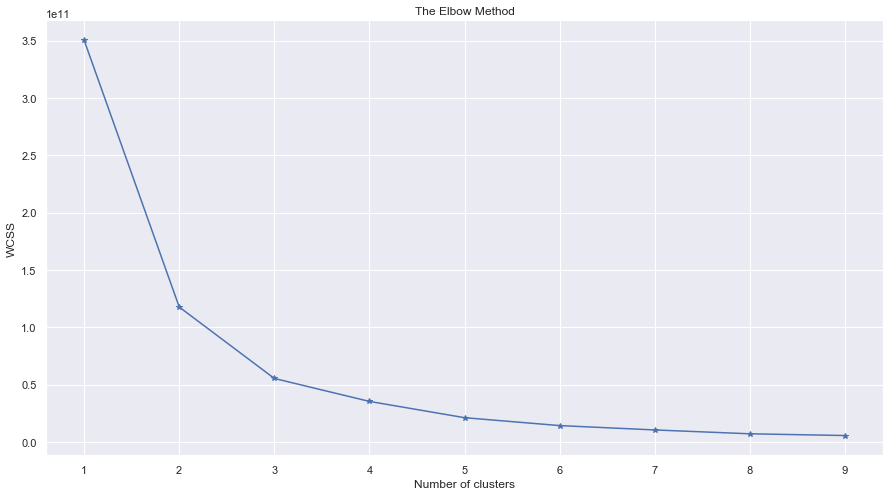

In [80]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(retailDataRFM)
    wcss.append(kmeans.inertia_)

f, ax = plt.subplots(figsize=(15, 8))  
plt.style.use('_classic_test_patch')  
plt.plot(range(1, 10), wcss, '-*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

The Sharp Bend is between 2 to 4 points. Thus, we can select 2 to 4 clusters.

***Project Task: Week 4***

Data Reporting:​​​​​​​

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

c. Bar graph to show the count of orders vs. hours throughout the day

d. Plot the distribution of RFM values using histogram and frequency charts

e. Plot error (cost) vs. number of clusters selected


f. Visualize to compare the RFM values of the clusters using heatmap